In [ ]:
import pandas as pd
import os
from google.colab import drive
pd.options.mode.chained_assignment = None

drive.mount('/content/drive')

folder_path = '/content/drive/Shared drives/Google Hackathon Data Common/Job Categories/'

all_states_data = []

# Loop through each file in the specified folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):  # Check if the file is a CSV file
        file_path = os.path.join(folder_path, filename)

        # Extract the state name from the filename
        # Assuming format: 'Categories of Jobs in <State> (2023).csv'
        state_name = filename.replace('Categories of Jobs in ', '').replace(' (2023).csv', '')

        # Load the CSV file into a DataFrame
        df = pd.read_csv(file_path)

        # Extract relevant columns: industry name and worker count
        df_state = df[['Variable properties name', 'Variable observation value']]

        # Rename columns for easier reference
        df_state.columns = ['Industry', 'Workers']

        # Calculate the total number of workers in the state (sum of all industry counts)
        total_workers_state = df_state['Workers'].sum()

        # Calculate the proportion of workers in each industry
        df_state['Proportion'] = df_state['Workers'] / total_workers_state

        # Add a column for the state name (based on the parsed filename)
        df_state['State'] = state_name

        # Append the DataFrame to the list
        all_states_data.append(df_state[['State', 'Industry', 'Proportion']])

# Concatenate all the individual state DataFrames into a single DataFrame
combined_df = pd.concat(all_states_data, ignore_index=True)

# Pivot the DataFrame to make each state a column, with industries as rows
pivoted_df = combined_df.pivot_table(index='Industry', columns='State', values='Proportion')

# Display the pivoted table with industries as rows and states as columns
pivoted_df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Dakota,South Dakota,Washington
Industry,,,,,,,,,,,,,,,,,,,,,
"Population Working in Other Services, Except Public Administration",0.024119,0.032964,0.027281,0.022064,0.031540,0.032449,0.033076,0.029997,0.030164,0.024401,...,0.037988,0.027178,0.024647,0.031485,0.033749,0.025214,0.036529,0.031776,0.028411,0.029801
Population Working in the Accommodation and Food Services Industry,0.088738,0.084832,0.097332,0.088581,0.094520,0.104967,0.075793,0.104923,0.110151,0.092569,...,0.116179,0.080883,0.204042,0.084075,0.074863,0.109161,0.078929,0.090323,0.093465,0.081696
Population Working in the Administrative and Support and Waste Management Services Industry,0.058459,0.034322,0.077624,0.055259,0.062503,0.057344,0.054595,0.071449,0.073146,0.071639,...,0.039846,0.050270,0.072949,0.055962,0.066434,0.056641,0.055947,NaN,0.031322,0.052448
"Population Working in the Agriculture, Forestry, Fishing, and Hunting Industry",0.005425,0.004145,0.007887,0.009176,0.022740,0.006599,0.003115,NaN,0.006854,0.004811,...,0.012764,0.014671,0.003555,0.002803,0.002314,0.009891,0.003040,0.013465,0.016190,NaN
"Population Working in the Arts, Entertainment, and Recreation Industry",0.012377,0.017524,0.021515,0.012806,0.021708,0.024885,0.017265,0.022430,0.028361,0.012864,...,0.025029,0.015435,0.027157,0.019181,0.015175,0.018918,0.018256,0.031682,0.020732,0.022247
Population Working in the Construction Industry,0.050176,0.052609,0.071159,0.055530,0.051203,0.068671,0.039703,0.061471,0.065521,0.045628,...,0.073032,0.059040,0.072778,0.045992,0.038379,0.065301,0.041303,0.076118,0.062495,0.062915
Population Working in the Educational Services Industry,0.083766,0.095658,0.078344,0.083666,0.082770,0.085290,0.104859,0.038600,0.067772,0.084382,...,0.087691,0.094327,0.056095,0.093885,0.096775,0.095756,0.100797,NaN,0.081990,0.081413
Population Working in the Finance and Insurance Industry,0.035656,0.019438,0.051735,0.031156,0.028495,0.040879,0.058447,0.107534,0.046207,0.039466,...,0.033964,0.052240,0.028115,0.037594,0.045053,0.026030,0.056539,0.046848,0.051191,0.027745
Population Working in the Health Care and Social Assistance Industry,0.142040,0.162429,0.146504,0.164211,0.158052,0.136650,0.181866,0.190584,0.142051,0.126818,...,0.154367,0.150963,0.105615,0.148756,0.160469,0.170467,0.193972,0.182148,0.167073,0.146925


In [ ]:
import numpy as np

def entropy_index(proportions):
  """Calculates the entropy index for a given set of proportions."""
  proportions = np.array(proportions)
  proportions = proportions[~np.isnan(proportions)]  # Remove NaN values
  if proportions.size == 0:
    return 0  # Return 0 if no valid proportions are found
  entropy = -np.sum(proportions * np.log(proportions))
  return entropy


# Calculate the entropy index for each state
state_entropy_indices = {}
for state in pivoted_df.columns:
  proportions = pivoted_df[state].values.tolist()
  entropy = entropy_index(proportions)
  state_entropy_indices[state] = entropy

# Create a DataFrame from the entropy indices
entropy_df = pd.DataFrame(list(state_entropy_indices.items()), columns=['State', 'Entropy Index'])

# Display the table of entropy indices
entropy_df

,State,Entropy Index
0,Alabama,2.638670
1,Alaska,2.651509
2,Arizona,2.744126
3,Arkansas,2.652754
4,California,2.729192
5,Colorado,2.686675
6,Connecticut,2.645884
7,Delaware,2.501663
8,Florida,2.705786
9,Georgia,2.727957


In [ ]:
file_path = '/content/drive/Shared drives/Google Hackathon Data Common/gini.csv'
gini_df = pd.read_csv(file_path)

gini_df_cleaned = gini_df[['Fips', 'Data Type']]
gini_df_cleaned.columns = ['State', 'Gini Coefficient']

# Display the cleaned DataFrame
gini_df_cleaned

,State,Gini Coefficient
1,Alabama,0.4771
2,Alaska,0.4492
4,Arizona,0.4650
5,Arkansas,0.4740
6,California,0.4870
8,Colorado,0.4575
9,Connecticut,0.4954
10,Delaware,0.4557
11,Dist. of Columbia,0.5163
12,Florida,0.4829


Correlation coefficient: 0.48200602054153124


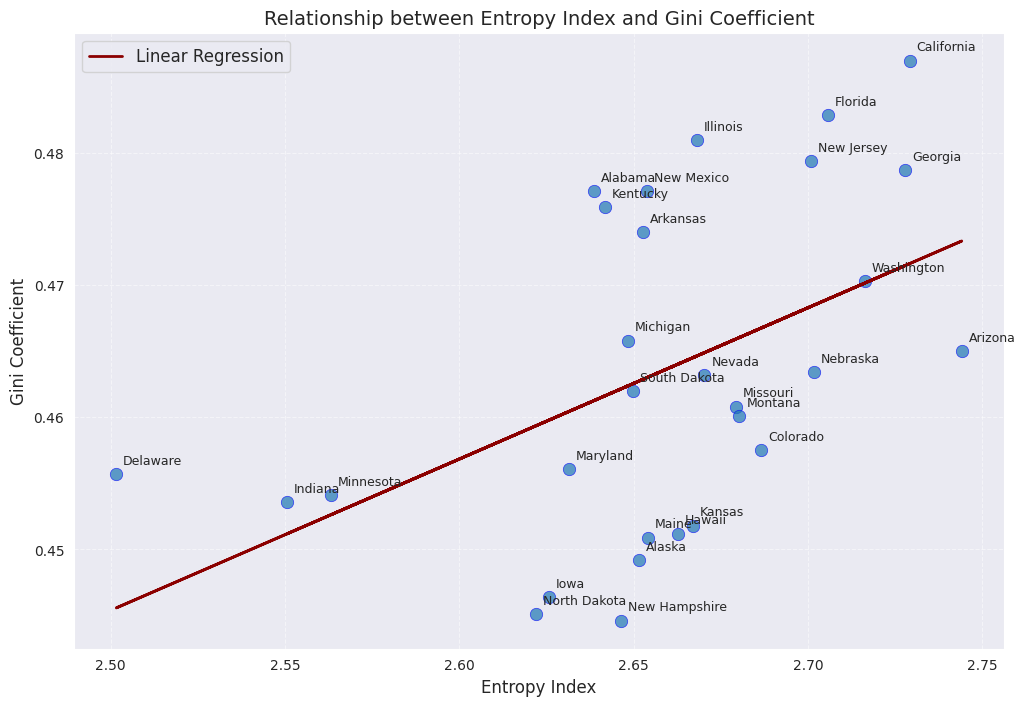

Correlation coefficient: -0.5720214698257313


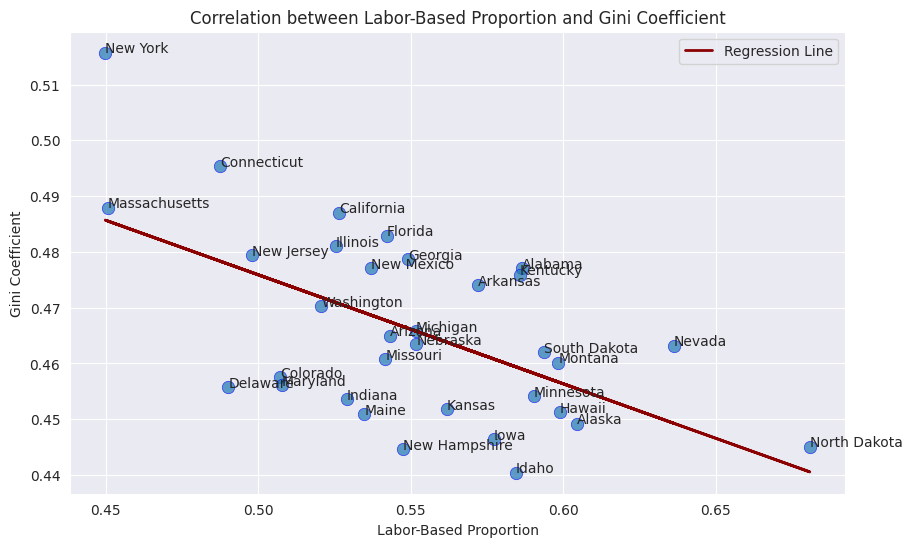

In [ ]:
# Exclude specified outlier states
states_to_exclude = ['New York', 'Connecticut', 'Massachusetts', 'Idaho']
merged_df = pd.merge(entropy_df, gini_df_cleaned, on='State')
merged_df = merged_df[~merged_df['State'].isin(states_to_exclude)]

# Convert 'Gini Coefficient' to numeric, handling potential errors
merged_df['Gini Coefficient'] = pd.to_numeric(merged_df['Gini Coefficient'], errors='coerce')

# Remove rows with NaN values in 'Gini Coefficient'
merged_df = merged_df.dropna(subset=['Gini Coefficient'])

# Perform linear regression
X = merged_df['Entropy Index'].values.reshape(-1, 1)
y = merged_df['Gini Coefficient'].values

reg = LinearRegression().fit(X, y)

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(merged_df['Entropy Index'], merged_df['Gini Coefficient'])[0, 1]

# Generate the plot with improved aesthetics
plt.figure(figsize=(12, 8))
plt.scatter(merged_df['Entropy Index'], merged_df['Gini Coefficient'],
            s=80,  # Increase marker size
            alpha=0.7,  # Adjust transparency
            edgecolors='blue',  # Add white edge to markers
            linewidths=0.5)
plt.plot(X, reg.predict(X), color='darkred', label='Linear Regression', linewidth=2)

# Add state labels to the points with improved aesthetics
for i, row in merged_df.iterrows():
  plt.annotate(row['State'], (row['Entropy Index'], row['Gini Coefficient']),
               fontsize=9,  # Adjust font size
               xytext=(5, 5),  # Offset the label slightly
               textcoords='offset points',
               ha='left',  # Align label to the left
               va='bottom')  # Align label to the bottom

plt.xlabel('Entropy Index', fontsize=12)
plt.ylabel('Gini Coefficient', fontsize=12)
plt.title('Relationship between Entropy Index and Gini Coefficient', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)  # Add a dashed grid with reduced opacity
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

print(f"Correlation coefficient: {correlation_coefficient}")

plt.show()

# Define knowledge-based industries
knowledge_based_industries = [
    "Population Working in the Finance and Insurance Industry",
    "Population Working in the Health Care and Social Assistance Industry",
    "Population Working in the Management of Companies and Enterprises Industry",
    "Professional, Scientific, and Technical Services Workers",
    "Real Estate and Rental and Leasing Workers",
    "Population Working in the Information Industry",
    "Population Working in the Educational Services Industry",
    "Population Working in the Administrative and Support and Waste Management Services Industry",
    "Population Working in Other Services, Except Public Administration"
    "Pro"
]

# Calculate labor-based proportion for each state
state_labor_based_proportions = {}
for state in pivoted_df.columns:
    if state not in ['High_Paying_Proportion', 'Low_Paying_Proportion']:
        labor_based_sum = pivoted_df.loc[~pivoted_df.index.isin(knowledge_based_industries), state].sum()
        state_labor_based_proportions[state] = labor_based_sum

# Create DataFrame for labor-based proportions
labor_based_proportions_df = pd.DataFrame(list(state_labor_based_proportions.items()), columns=['State', 'Labor_Based_Proportion'])

# Merge with Gini coefficient data
merged_df = pd.merge(labor_based_proportions_df, gini_df_cleaned, on='State')

# Convert 'Gini Coefficient' to numeric
merged_df['Gini Coefficient'] = pd.to_numeric(merged_df['Gini Coefficient'], errors='coerce')

# Remove rows with NaN values in 'Gini Coefficient'
merged_df = merged_df.dropna(subset=['Gini Coefficient'])

# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(merged_df['Labor_Based_Proportion'], merged_df['Gini Coefficient'])[0, 1]

# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Labor_Based_Proportion'], merged_df['Gini Coefficient'],
            s=80,  # Increase marker size
            alpha=0.7,  # Adjust transparency
            edgecolors='blue',  # Add white edge to markers
            linewidths=0.5)

# Add regression line
slope, intercept = np.polyfit(merged_df['Labor_Based_Proportion'], merged_df['Gini Coefficient'], 1)
plt.plot(merged_df['Labor_Based_Proportion'], slope * merged_df['Labor_Based_Proportion'] + intercept, color='darkred', label='Regression Line', linewidth=2)

# Add state labels
for i, row in merged_df.iterrows():
    plt.annotate(row['State'], (row['Labor_Based_Proportion'], row['Gini Coefficient']))

plt.xlabel('Labor-Based Proportion')
plt.ylabel('Gini Coefficient')
plt.title('Correlation between Labor-Based Proportion and Gini Coefficient')
plt.grid(True)
plt.legend()

print(f"Correlation coefficient: {correlation_coefficient}")

plt.show()

In [ ]:
# For the first graph (Entropy Index vs. Gini Coefficient)
print("Equation for Entropy Index vs. Gini Coefficient:")
print(f"y = {reg.coef_[0]:.4f}x + {reg.intercept_:.4f}")

# For the second graph (Labor-Based Proportion vs. Gini Coefficient)
print("\nEquation for Labor-Based Proportion vs. Gini Coefficient:")
print(f"y = {slope:.4f}x + {intercept:.4f}")

Equation for Entropy Index vs. Gini Coefficient:
y = 0.1146x + 0.1589

Equation for Labor-Based Proportion vs. Gini Coefficient:
y = -0.1955x + 0.5736
